In [ ]:
# Estadística básica

# ¿Qué es Pandas?
* Pandas es una muy popular librería de código abierto dentro de los desarrolladores de Python, y sobre todo dentro del ámbito de Data Science y Machine Learning, ya que ofrece unas estructuras muy poderosas y flexibles que facilitan la manipulación y tratamiento de datos.

* Pandas surgió como necesidad de aunar en una única librería todo lo necesario para que un analista de datos pudiese tener en una misma herramienta todas las funcionalidades que necesitaba en su día a día, como son: cargar datos, modelar, analizar, manipular y prepararlos.

## Analizar datos con Pandas
* A día de hoy, aunque no seamos todavía del todo conscientes, vivimos en un mundo en el que podemos sacar información muy valiosa de los datos, aunque a priori no la conozcamos. El principal problema que nos encontramos es que, a simple vista, no somos capaces de obtener ese conocimiento, por eso necesitamos de herramientas como Pandas que nos ayuden en este proceso.

* mA continuación se enumeran funciones muy valiosas de Pandas que pueden ayudarnos para hacer un análisis en profundidad de los datos con los que se esté trabajando:

* head(n): Esta función devuelve las primeras n filas de nuestro DataFrame.
* tail(n): Devuelve las n últimas filas de nuestro DataFrame.
* describe(): Esta función da estadísticas descriptivas incluyendo aquellas que resumen la tendencia central, dispersión y la forma de la distribución de los datos.

In [ ]:
* Empezemos cargando `pandas`.

In [63]:
import pandas as pd
#import numpy as np
from matplotlib import pyplot as plt
#import random

## Preparando los datos

* Vamos a cargar el archivo de datos `peso_estatura_genero`. Lo usaremos a lo largo esta actividad y lo puedes encontrar en el repositorio del curso.*

In [40]:
df = pd.read_csv("peso_estatura_genero.csv")

* A continuación, vamos a leer el archivo y a revisar su contenido, haremos cambio de unidades.

In [41]:
#Cambio de libras a kg y pulgadas a cms
df.Estatura = df.Estatura*2.54
df.Peso = df.Peso/2.2
df

,Genero,Estatura,Peso
0,Male,187.571423,109.951620
1,Male,174.706036,73.777487
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364
...,...,...,...
9995,Female,168.078536,62.171570
9996,Female,170.350573,77.667230
9997,Female,162.224700,58.397872
9998,Female,175.346978,74.478391


* Para este ejercicio, las variables que vamos a considerar son las siguientes:
  * **Genero**: Male/Female.
  * **Estatura**: Estatura de la persona(cms).
  * **Peso**: Peso de la persona(kg).


### Revisando el conjunto de datos

* `shape`nos permite conocer las dimensiones del `DataFrame` (renglones y columnas).

In [42]:
df.shape

(10000, 3)

* `info` nos permite conocer el tipo de dato de cada columna. También nos indica cuantos reglones, por columna, tiene algún valor nulo (o faltante).

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genero    10000 non-null  object 
 1   Estatura  10000 non-null  float64
 2   Peso      10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


* `colums`nos muestra los índices de las columnas.

In [44]:
df.columns

Index(['Genero', 'Estatura', 'Peso'], dtype='object')

* Para mostrar los primeros elementos de la estructura, ejecutamos el método head:

In [45]:
#df = df.drop('Unnamed: 0', axis=1)
df.head()

,Genero,Estatura,Peso
0,Male,187.571423,109.951620
1,Male,174.706036,73.777487
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364


* Para generar estadísticas descriptivas, ejecutamos el comando describe.

In [46]:
df.describe()

,Estatura,Peso
count,10000.000000,10000.000000
mean,168.573602,73.381980
std,9.772721,14.594745
min,137.828359,29.409149
25%,161.304276,61.735478
50%,168.447898,73.278604
75%,175.702625,85.077057
max,200.656806,122.722590


### Más filtros

In [47]:
more_than_190 = df[df['Estatura'] > 190]
more_than_190.head(80)

,Genero,Estatura,Peso
23,Male,191.023173,103.982628
190,Male,194.842981,106.834281
197,Male,192.898929,105.420340
202,Male,190.857686,101.874669
232,Male,193.094223,107.239118
...,...,...,...
3909,Male,195.751082,113.231928
3918,Male,194.404390,110.576135
4065,Male,191.906023,99.494220
4077,Male,190.441460,113.113124


In [48]:
double_filter = df[(df['Estatura'] > 190) & (df['Peso'] < 100)]
double_filter.head(4)

,Genero,Estatura,Peso
534,Male,190.611747,94.784740
649,Male,190.651558,99.356222
673,Male,194.314784,99.037430
711,Male,191.493882,99.365771


## Medidas de tendencia central

A primera vista, resumir los datos puede parecer bastante fácil: calculamos la media de los datos y listo. De hecho, si bien la media es fácil de calcular y conveniente de usar, es posible que no siempre sea la mejor medida para un valor central. Por esta razón, los estadísticos han desarrollado varias estimaciones alternativas a la media.

### Media

La estimación más básica de cómo están conformados los datos es el valor medio, media o promedio. La media es la suma de todos los valores dividida por el número de valores. Considera el siguiente conjunto de números: [3, 3, 1, 2]. La media es (3 + 5 + 1 + 2) / 4 = 11 / 4 = 2.75. El símbolo  $\bar{x}$ representa la media de la muestra de una población (se pronuncia x-bar). La fórmula para calcula la media de una conjunto de N valores ($x_1$,$x_2$,...,$x_N$) es:

Media = $\bar{x}$ = $\frac{\sum_{i=1}^{N}x_i}{N}$

In [49]:
print('Media: ', df['Estatura'].mean())

Media:  168.57360177736064


### Media recortada

Una variación de la media es la media recortada, la cual es calculada después de eliminar los extremos de un conjunto de valores ordenados y luego calculamos el promedio de los valores restantes. De un conjunto de valores ordenados ($x_1$, $x_2$,...,$x_N$) donde $x_1$ es el valor más pequeño y $x_N$ es el valor más grande, la fórmula para calcular la media recortada con los p valores más pequeños y más grandes omitidos es:

Media recortada = $\bar{x}$ = $\frac{\sum_{i=p + 1}^{N - p}x_i}{N - 2p}$

La media recortada elimina la influencia de valores extremos. Por ejemplo, la puntuación de los concursos internacionales de clavados se obtiene eliminando la puntuación máxima y mínima de los jueces y calculando el promedio de las puntuaciones restantes. Esto imposibilita que un solo juez manipule la puntuación, quizás para favorecer al competidor de su país. Las medias recortadas se utilizan ampliamente y, en muchos casos, es preferible utilizarlas en lugar de la media ordinaria.

In [57]:
sorted = df['Estatura'].sort_values()
sorted

9285    137.828359
6624    138.726819
7294    139.379268
7617    140.077336
5345    140.554691
           ...    
994     198.363503
1317    199.293614
3285    199.461654
3757    199.698290
2014    200.656806
Name: Estatura, Length: 10000, dtype: float64

In [58]:
sorted = sorted.reset_index(drop = True)
sorted

0       137.828359
1       138.726819
2       139.379268
3       140.077336
4       140.554691
           ...    
9995    198.363503
9996    199.293614
9997    199.461654
9998    199.698290
9999    200.656806
Name: Estatura, Length: 10000, dtype: float64

In [59]:
p = 5
acum = 0
for i in range(p, len(sorted) - p):
    acum += sorted[i]
croppedMean =  acum / (len(sorted) - (2 * p))
print('Media recortada: ', croppedMean)

Media recortada:  168.57277051391057


In [61]:
p = 5
acum = sum(sorted.values.flatten()[p:len(df['Estatura'])-p])
croppedMean = acum / (len(sorted) - (2 * p))
print('Media recortada: ', croppedMean)

Media recortada:  168.57277051391057


### Media ponderada

Otro tipo de media es la media ponderada, que se calcula multiplicando cada valor $x_i$ por un peso $w_i$ y dividiendo la suma por la suma de los pesos. La fórmula para una media ponderada es:

Media ponderada = $\bar{x_{w}}$ = $\frac{\sum_{i=1}^{N}w_{i}x_{i}}{\sum_{i=1}^{N}w_{i}}$

Hay dos razones principales para usar una media ponderada:
* Algunos valores son intrínsecamente más variables que otro, y las observaciones muy variables reciben un peso menor. Por ejemplo, si tomamos el promedio de varios sensores y uno de los sensores es menos preciso, entonces podríamos reducir el peso de ese sensor.
*  Los datos recopiladores no representan igualmente a los diferentes grupos que nos interesa medir. Por ejemplo, debido a la forma en que se realizó un experimente en línea, es posible que no tengamos un conjunto de datos que refleje con precisión todos los grupos de usuarios. Para corregir eso, podemos dar un mayor peso a los valores de los grupos que estaban subrepresentados.

In [64]:
weights = [random.random() for i in range(len(df['Estatura']))]
print(weights)

[0.8361424042258804, 0.7321155813575402, 0.3507191216943706, 0.2555257159294547, 0.037087957195943044, 0.08528562713704768, 0.4662633483299087, 0.6432346358813805, 0.8404222535216708, 0.32106797450113733, 0.5128118331563694, 0.5745617567424686, 0.43110814183960766, 0.9269017119517199, 0.8505955966161084, 0.7779099426869998, 0.06997127905007083, 0.6834989006032772, 0.3769605058027006, 0.16942048666434995, 0.9244582943377666, 0.3830019221748052, 0.3391556208614721, 0.4153852673865769, 0.940423733121684, 0.893782129989982, 0.700409306330713, 0.9704084405358411, 0.6198343402464069, 0.44755697651838466, 0.3385042091009046, 0.5211134954075711, 0.0872594800171358, 0.8952140452177373, 0.9069762095511549, 0.35599944329987354, 0.13440245692512454, 0.7979961483656131, 0.465838438688289, 0.9899845345543379, 0.5366202688192486, 0.6050152929326081, 0.8493770632034388, 0.313001802146445, 0.3921461031000867, 0.9373239713287244, 0.440979104157736, 0.33870628720878426, 0.4734463663097024, 0.451264703346

In [65]:
accWeightedValues = df['Estatura'].values.flatten().dot(weights)
weightedMean = accWeightedValues / sum(weights)
print('Media ponderada: ', weightedMean)

Media ponderada:  168.51758870589953


### Moda

La moda es el valor con mayor frecuencia en la distribución de datos. Si tomamos como ejemplo una muestra compuesta de los siguientes 5 números: 3, 8, 2, 8, 1; el valor modal es 8, ya que se es el que se repite la mayor cantidad de veces. La moda sirve para definir lo más común, lo que más se usa o lo que es más frecuente, en términos matemáticos, el valor de mayor frecuencia absoluta.

In [66]:
moda = pd.Series(df['Estatura'].values.flatten()).mode()[0]
print('Moda: ', moda)

Moda:  137.82835865820002


### Mediana

La mediana es el número del medio de una lista de datos ordenada. Si hay un número par de valores de datos, el valor medio es uno que no está realmente en el conjunto de datos, sino que es el promedio de los dos valores que dividen los datos ordenados en dos mitades. En comparación con la media, que usa todas las observaciones, la mediana solo depende de los valores en el centro de los datos ordenados. Si bien, esto puede parecer una desventaja, dado que la media es mucho más sensible a los datos, hay muchos casos en los que la mediana es una mejor métrica para la ubicación. Supongamos que queremos analizar los ingresos familiares típicos en los vecindarios de una zona. Al comparar un vecindario de ingresos altos con un vecindario de ingresos bajos, usar la media producirá resultados muy diferentes. Si usamos la mediana, no importa cuán rico sean los que vivan en un vecindario; la posición de la observación intermedia seguirá siendo la misma.

In [67]:
print('Mediana:', df['Estatura'].median())

Mediana: 168.4478980032


Por las mismas razones por las que usamos una media ponderada, también es posible calcular una mediana ponderada. Al igual que con la mediana, primero ordenamos los datos, aunque cada valor de datos tiene un peso asociado. En lugar de tomar el número del medio, la mediana pondera es el valor tal que la suma de los pesos es igual para ambas mitades de la lista ordenada. Como la mediana, la mediana ponderada es robusta a los valores atípicos (outliners).

### Valores atípicos

La mediana no es la única estimación sólida de la ubicación. De hecho, una media recortada se usa ampliamente para evitar la influencia de valores atípicos. Por ejemplo, recortar el 10% inferior y superior (una estrategia muy usada) de los datos proporcionará protección contra valores atípicos en todos los conjuntos de datos, excepto en los más pequeños. Se puede pensar en la media recortada como un compromiso entre la media y la mediana: es robusta a los valores extremos en los datos, pero utiliza más datos para calcular la estimación de la ubicación.

### Desviación estándar

La ubicación es solo una dimensión para resumir una característica. Una segunda dimensión, la variabilidad, también conocida como dispersión, mide que tan agrupados o dispersos están los datos. La variabilidad es un concepto muy importante a tener en cuenta: hay que medirla, reducirla, distinguir en la variabilidad aleatoria y la real, identificar las diversas fuentes de variabilidad real y tomar decisiones sobre ella. Asi como existen diferentes formas de medir la ubicación (media, mediana, etc.) también existen diferente formas de medir la variabilidad.

Las estimaciones de variación más utilizadas se basan en las diferencia entre la media (una estimación de ubicación) y los datos observados. Para un conjunto de datos, [1, 4, 4], la media es 3 y la mediana es 4. Las desviaciones de la media son las diferencias (1 - 3 = -2, 4 - 3 = 1, 4 - 3 = 1). Estas desviaciones nos dicen qué tan dispersos están los datos alrededor del valor central.

Las estimaciones de variabilidad más conocidas son la varianza y la desviación estándar, que se basan en desviaciones cuadradas. La varianza es un promedio de las desviaciones cuadradas y la desviación estándar es la raíz cuadrada de la varianza.

Varianza = $s^{2}$ = $\frac{\sum_{i=1}^{N}(x_{i} - \bar{x})^{2} }{N - 1}$

Desviación estándar = $\sqrt{Varianza}$

In [68]:
print('Varianza: ', df['Estatura'].var())

Varianza:  95.50608408624122


In [69]:
print('Desviación estándar: ', df['Estatura'].std())

Desviación estándar:  9.772721426820741


### Desviación absoluta mediana

Promediar las desviaciones en sí no nos diría mucho: las desviaciones negativas compensan las positivas. De hecho, la suma de las desviaciones de la media es exactamente cero. En cambio, un enfoque simple es tomar el promedio de los valores absolutos de las desviaciones de la media. En el ejemplo anterior, el valor absoluto de las desviaciones es [2, 1, 1] y su promedio es (2 + 1+ 1) / 3 = 1.33. Esta se conoce como la desviación absoluta media y se calcula mediante la fórmula:

Desviación absoluta mediana = $Mediana(\left | x_{1} - m \right |, \left | x_{2} - m \right |, ..., \left | x_{N} - m \right |)$

La desviación estándar es mucho más fácil de interpretar que la varianza, ya que está en la misma escala que los datos originales. Aun así, con su fórmula más complicada y menos intuitiva, puede parecer extraño que en las estadísticas se prefiera la desviación estándar a la desviación media absoluta. Su preferencia se debe a que, matemáticamente, trabajar con valores cuadrados es mucho más conveniente que con valores absolutos, especialmente para modelos estadísticos.

In [70]:
dam = pd.Series(df['Estatura'].values.flatten()).mad()
print('Desviación absoluta media: ', dam)

Desviación absoluta media:  8.046780026124935


### Estimaciones basadas en percentiles

Un enfoque diferente que se puede emplear para estimar la dispersión se basa en observar la separación de los datos clasificados. Las estadísticas basadas en datos ordenados, o clasificados, se denominan estadísticas de orden. La medida más básica es el rango: la diferencia entre el número más grande y el más pequeño. Es útil conocer los valores mínimos y máximos en sí mismos y para identificar los valores atípicos, pero el rango es extremadamente sensible a los valores atípicos y no es muy útil como medida general de dispersión.

Para evitar la sensibilidad a valores atípicos, podemos mirar el rango de los datos después de eliminar los valores de cada extremo. Formalmente, este tipo de estimaciones se basan en diferencias entre percentiles. En un conjunto de datos, el $n$-ésimo percentil es un valor tal que, al menos, el $n$ por ciento de los valores toman este valor o menos $(100 - n)$ por ciento de los valores toman este valor o más. Por ejemplo, si queremos conocer el percentil 80, ordenamos los dartos. Luego, comenzando con el valor más pequeño, continuamos el 80 por ciento del camino hasta el valor más grande. Ten en cuenta que la mediana es lo mismo que el percentil 50. El percentil es, esencialmente, lo mismo que un cuantil, con cuantiles indexados por fracciones (el cuantil .8 es el percentil 80).

Una medida común de variabilidad es la diferencia entre el percentil 25 y el percentil 75, también llamado rango intercuartílico (o IQR). Por ejemplo, queremos conocer el IQR del conjunto de datos [3, 1, 5, 3, 6, 7, 2, 9]. Ordenamos los datos para obtener [1, 2, 3, 3, 5, 6, 7, 9]. El percentil 25 está en 2.5, el percentil 75 está en 6.5, por lo que el rango intercuartílico es 6.5 - 2.5 = 4.

In [71]:
df['Estatura'].quantile([0.25,0.50, 0.75])

0.25    161.304276
0.50    168.447898
0.75    175.702625
Name: Estatura, dtype: float64

El método de *métrica* puede ser cualquiera de los estadísticos que vimos anteriormente (min, max, sum, count, mean, median, std, var).

In [74]:
# Calcular la estatura máxima por grupo de género.
df.groupby(['Genero']).max()[['Estatura']]

,Estatura
Genero,
Female,186.409548
Male,200.656806


In [75]:
# Calcular la estatura minima por grupo de género.
df.groupby(['Genero']).min()[['Estatura']]

,Estatura
Genero,
Female,137.828359
Male,148.353539


In [77]:
# Calcular la estaura promedio por grupo de genero.

df.groupby(['Genero']).mean()[['Estatura']]

,Estatura
Genero,
Female,161.820285
Male,175.326919


In [79]:
value = df.values

In [80]:
dhombres = df.values[:5000]
dmujeres = df.values[5000:]
peso_h = dhombres[:,2]
peso_m = dmujeres[:,2]
altura_h = dhombres[:,1]
altura_m = dmujeres[:,1]

(array([  22.,  321., 1492., 2084.,  950.,  119.,   12.]),
 array([51.319517909090905, 61.5199568116883, 71.7203957142857,
        81.9208346168831, 92.1212735194805, 102.3217124220779,
        112.5221513246753, 122.7225902272727], dtype=object),
 <BarContainer object of 7 artists>)

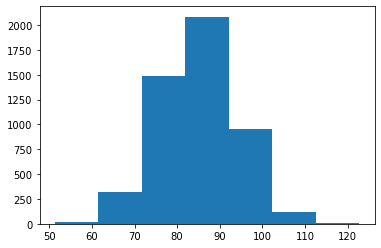

In [81]:
plt.hist(peso_h,7) #el numero son los bins del histograma